**Name            :  Bhargav R Pandya**

**S_Id            :  202218055**

**Assignment 2**


In [131]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

**Generate 20 real number for the variable X from the uniform distribution U [0,1]**
**Construct the training set T = { (x1,y1),(x2,y2),......,(x20,y20)} using the relation
Yi = sin (2 π xi) + εi where εi ~ N(0,0.25)**

In [132]:
# create datafreame of x(uniformly distributed ) and y ( = sin(2*pi*x)+error)
def get_x(low,high,size , mean , sigma):
    x = np.random.uniform(low,high,size)
    e = np.random.normal(mean,sigma,size)
    y = np.sin(2*math.pi*x)+e
    df = pd.DataFrame(x , columns = ['X'])
    df['Y'] = y
    return df

In [133]:
# set random seed
np.random.seed(3)
# train_df
df_train = get_x(0,1,20,0,0.25)
df_train

,X,Y
0,0.550798,-0.068189
1,0.708148,-1.240890
2,0.290905,0.670892
3,0.510828,-0.119392
4,0.892947,-0.251511
5,0.896293,-0.547288
6,0.125585,0.453756
7,0.207243,0.785882
8,0.051467,0.474082
9,0.440810,0.323260


**In the similar way construct a testing set of size 50 i.e. Test =
{(x’1,y’1),(x’2,y’2),......,(x’50,y’50)}**

In [134]:
df_test = get_x(low = 0,high = 1, size = 50, mean = 0,sigma = 0.25)
df_test

,X,Y
0,0.457686,0.423534
1,0.860534,-0.706099
2,0.586253,-0.864742
3,0.283488,1.325861
4,0.277978,0.641922
5,0.454622,0.340911
6,0.205410,1.114529
7,0.201379,0.744220
8,0.514035,-0.051805
9,0.087229,0.813019


**Estimate the Least Square polynomial regression model of order M= 1,2, 3, 9,
using the training set T.**

In [135]:
# generate A which is append by 1 
# m is degree
def generate_A(m , X ):
    df_a = pd.DataFrame()
    for i in range(m,-1,-1):
        temp = pd.DataFrame(X**(i))
        df_a = pd.concat([df_a , temp] , axis = 1)
    k = np.array(tuple(np.array(df_a)))
    return k

In [136]:
#create a fucntion for least square formula and return rmse , col matrix contain coefficient and datafreame
def poly(df , m , df_test):
  X = np.array(df.iloc[:,:1])       # create X for creating matrix A
  Y = np.array(df.iloc[:,1])        # create Y 
    
  A = generate_A(m,X)               # create A of degree m 

  A_T_A = np.dot(A.T , A)           # dot product of A.T and A
  inverse = np.linalg.inv(A_T_A)    # invrese of above multiplication
  k = np.dot( A.T , Y)              # multiplication of A.T and Y
  u = np.dot(inverse , k)           # multiplication of final and we get coefficient of m degree polynomialn
  
  est = np.dot(A,u)                 # estimate Y for train
  df["est_of_degree_"+str(m)] = est   # added in datafream just for see the value
  RMSE = np.sqrt(sum((Y-df["est_of_degree_"+str(m)])**2)/len(df))     # train RMSE
  
  test_X = np.array(df_test.iloc[:,:1])        # create X for test X
  test_Y = np.array(df_test.iloc[:,1])         # create Y for train Y
  test_A = generate_A(m,test_X)                # create A of order m with using test_X
  df_test["est_of_degree_"+str(m)] = np.dot(test_A,u)      # estimated Y using train 'u'

  test_rmse = np.sqrt(sum((test_Y-df_test["est_of_degree_"+str(m)])**2)/len(df_test))    # test RMSE
  return df , RMSE , df_test , test_rmse , u


def graph(x,y,u,m):
    plt.scatter(x,y)
    mean_y = np.sin(2*np.pi*x)
    plt.scatter(x, mean_y)
    x = np.linspace(0,1,100)
    x = x.reshape(100,1)
    A = generate_A(m , x )
    u = u.reshape(len(u),1)
    Y = np.dot(A,u)
    plt.plot(x,Y)
    plt.legend(["train_data" ,"test_data","predicted_curve"])
    plt.show()
        
    

In [137]:
degree = [1,2,3,5,9]

**List the value of coefficients of estimated polynomial regression models for
each case.**

**Obtain the prediction on testing set and compute the RMSE for polynomial
regression models for order M =1,2,3 and 9.**

**Plot the estimate obtained by polynomial regression models for order M =1,2,3
and 9 for training**

**Plot the estimate obtained by polynomial regression models for order M =1,2,3   
and 9 for testing set along with y’1, y’2, , y’50. . Also plot the sin(2 π x’i) .**


Polynomial of degree 1
coefficent of polynomials =  [-1.69770848  0.71338333]
Train rmse =  0.5350823195430591
Test rmse =  0.5330872514844859


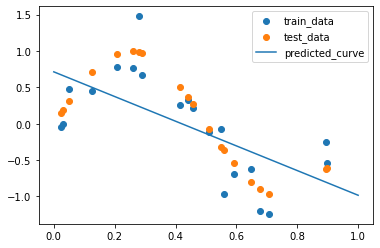

+++++++++++++++++++++++++

Polynomial of degree 2
coefficent of polynomials =  [-1.42013518 -0.4559736   0.53889008]
Train rmse =  0.5256562995575355
Test rmse =  0.5403427986231165


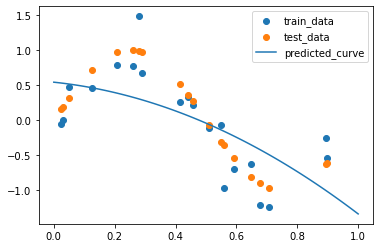

+++++++++++++++++++++++++

Polynomial of degree 3
coefficent of polynomials =  [ 28.5228388  -41.05849176  13.82802339  -0.3744318 ]
Train rmse =  0.24921854788501924
Test rmse =  0.2539951806597737


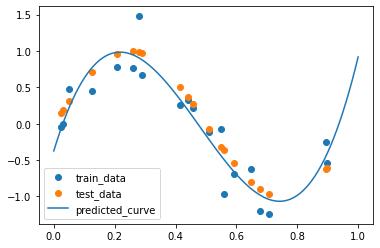

+++++++++++++++++++++++++

Polynomial of degree 5
coefficent of polynomials =  [-3.99652325e+01  1.15448901e+02 -8.97845535e+01  9.95328520e+00
  5.55400845e+00 -1.02777738e-01]
Train rmse =  0.2372548459256484
Test rmse =  0.27177556864434155


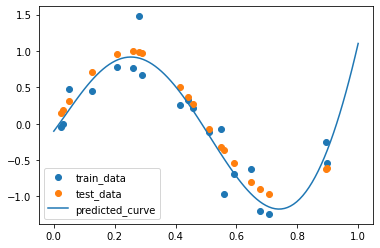

+++++++++++++++++++++++++

Polynomial of degree 9
coefficent of polynomials =  [-1.54719425e+04  4.24673372e+04 -3.40849539e+04 -8.19259082e+03
  2.94864681e+04 -1.93099171e+04  5.88896703e+03 -8.91778016e+02
  6.37994498e+01 -1.18220606e+00]
Train rmse =  0.21913807704275598
Test rmse =  3.523551465922925


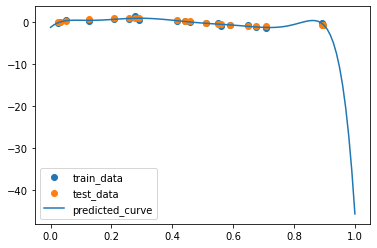

+++++++++++++++++++++++++


In [138]:
RMSE = pd.DataFrame(columns=['Degree' , 'train_RMSE' , 'test_RMSE'])
for ele in degree:
    print("")
    df_train , train_rmse , df_test , test_rmse , u   = poly(df_train , ele , df_test)
    RMSE.loc[len(RMSE.index)] = [ele , train_rmse , test_rmse]
    
    
    print("Polynomial of degree {}".format(ele))
    print("coefficent of polynomials = " , u)
    print("Train rmse = " ,  train_rmse)
    print("Test rmse = ",test_rmse)
    graph(np.array(df_train['X']),np.array(df_train['Y']),u,ele)
    print("+++++++++++++++++++++++++")

In [139]:
RMSE = RMSE.set_index('Degree')
RMSE

,train_RMSE,test_RMSE
Degree,,
1.0,0.535082,0.533087
2.0,0.525656,0.540343
3.0,0.249219,0.253995
5.0,0.237255,0.271776
9.0,0.219138,3.523551


**What happens when we increase the value of M. Note down your
observations.**
**Also, try to find the statistical reasons behind your observation.**

## ANS
**As we will increse the value of M (degree) then predicted polynomial will good fit on train data but not on train data that means here from above data freame we can see that 9 th degree polynomial overfit on data**

**In this data 3rd degree and 5th degree doing well but not 9th degree because train_rmse = 0.219138 but test_rmse = 3.523551**

**Estimated value**

In [140]:
df_train

,X,Y,est_of_degree_1,est_of_degree_2,est_of_degree_3,est_of_degree_5,est_of_degree_9
0,0.550798,-0.068189,-0.221711,-0.143097,-0.448072,-0.427329,-0.408224
1,0.708148,-1.240890,-0.488845,-0.496167,-1.042934,-1.146966,-1.202672
2,0.290905,0.670892,0.219512,0.286065,0.875782,0.888424,0.999234
3,0.510828,-0.119392,-0.153853,-0.064611,-0.222665,-0.165420,-0.211064
4,0.892947,-0.251511,-0.802580,-1.000621,-0.456784,-0.422572,-0.296624
5,0.896293,-0.547288,-0.808261,-1.010649,-0.427174,-0.387653,-0.505211
6,0.125585,0.453756,0.500176,0.459229,0.771099,0.601338,0.500896
7,0.207243,0.785882,0.361545,0.383399,0.981763,0.874255,0.732928
8,0.051467,0.474082,0.626007,0.511661,0.232388,0.197992,0.416987
9,0.440810,0.323260,-0.034983,0.061941,0.186015,0.282925,0.228542


In [141]:
df_test

,X,Y,est_of_degree_1,est_of_degree_2,est_of_degree_3,est_of_degree_5,est_of_degree_9
0,0.457686,0.423534,-0.063635,0.032712,0.088282,0.179450,0.110056
1,0.860534,-0.706099,-0.747552,-0.905127,-0.703593,-0.717901,0.464978
2,0.586253,-0.864742,-0.281903,-0.216516,-0.632120,-0.646889,-0.579550
3,0.283488,1.325861,0.232104,0.295497,0.895789,0.898553,0.995739
4,0.277978,0.641922,0.241459,0.302404,0.909460,0.904667,0.989878
5,0.454622,0.340911,-0.058432,0.038079,0.106132,0.198547,0.131076
6,0.205410,1.114529,0.364656,0.385308,0.980796,0.870794,0.724108
7,0.201379,0.744220,0.371501,0.389475,0.978111,0.862716,0.704823
8,0.514035,-0.051805,-0.159298,-0.070742,-0.241211,-0.186633,-0.227891
9,0.087229,0.813019,0.565293,0.488310,0.538297,0.404319,0.532289
